# Compile with the following OPTIONS File:

*# Options for compiling*<br>
**SHELL = /bin/bash**

*# Choose the COMPILER*<br>
**COMPILER = ifort**

*# Choose the Linear Algebra libraries*<br>
**LINALG = MKL**

*# Do you use DEBUG or Optimization Mode? (DEBUG/OPT)*<br>
**MODE = OPT**

*# Turn on omp or mpi (enter TRUE .or. FALSE)?*<br>
**OPENMP = FALSE**<br>
**MPI = FALSE**

*# Choose the MACHINE file*<br>
**MACHINE = HKQAI**

*# Choose HORSFIELD or McWEDA*<br>
**THEORY = McWEDA**

*# Choose HARRIS, DOGS, or KS (Kohn-Sham)*<br>
*# Note that the KS code only does LDA for now as it uses McWEDA routines.*<br> 
**SCF = DOGS**

*# Choose the DIAGONALIZATION Method - GAMMAD (divide and conquer),*<br>
*# KPOINTS, or MDET (also GAMMA) - Default is GAMMA*<br>
**DIAGONALIZATION = KPOINTS**

*# Choose the XC functional*<br>
**XC = LDA**


## Preparation

In [1]:
!cd ~/thunder2022/lightning/results/Si

In [2]:
# link the Fdata
!ln -s ~/thunder2022/datafiles/Fdata-McWEDA-0.15-3SN.Sis4.8p5.35 Fdata

ln: failed to create symbolic link 'Fdata/Fdata-McWEDA-0.15-3SN.Sis4.8p5.35': File exists


In [3]:
import os
import sys
import ase
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
from benchmark_tools.benchmark import Benchmark
from ase.io import read as aseread
from ase.build import bulk
from imageio.v2 import imread

## Set Plotting Arguments

In [5]:
mpl.rcParams.update({
    'font.size': 32,
    'font.weight' : "regular",
    #'axes.labelweight' : "bold",
    'figure.figsize': (16,12),
    'font.family': "serif",
    #'font.serif': ['cm10'],                   
    'text.usetex': True,
    #'text.latex.preamble': [r'\boldmath'],
    #'mathtext.default' : 'regular',
    #'font.sans-serif': ["DejaVu Sans"], 
    'axes.linewidth' : 2,
    'lines.linewidth' : 2,
    })

## Set benchmark systems

In [6]:
kwargs_update_scf = { 'kpt_size': [7, 7, 7], }
kwargs_update_eos = { 'kpt_size': [7, 7, 7], }

bm_McWEDA = Benchmark(
        mp_apikey = "R2rD2kAJuqQq5Xk7m66gt0unrcVAVsVY",
        mater_id = "mp-149",
        firerun = '/users/lewis/thunder2022/lightning/results/Si/lightning.x',
        Fdata_path = '/users/lewis/thunder2022/lightning/results/Si/Fdata',
        work_path = '/users/lewis/thunder2022/lightning/results/Si',
        )

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Full Formula (Si2)
Reduced Formula: Si
abc   :   3.849278   3.849279   3.849278
angles:  60.000012  60.000003  60.000011
pbc   :       True       True       True
Sites (2)
  #  SP        a      b      c    magmom
---  ----  -----  -----  -----  --------
  0  Si    0.875  0.875  0.875        -0
  1  Si    0.125  0.125  0.125        -0


## Calculate and plot band structure

  LIGHTNING RUNTIME :   0.323258000000000      [sec] 
  LIGHTNING RUNTIME :   0.278635000000000      [sec] 
Gap: 2.061 eV
Transition (v -> c):
  (s=0, k=0, n=3, [0.00, 0.00, 0.00]) -> (s=0, k=20, n=4, [0.31, -0.44, 0.54])


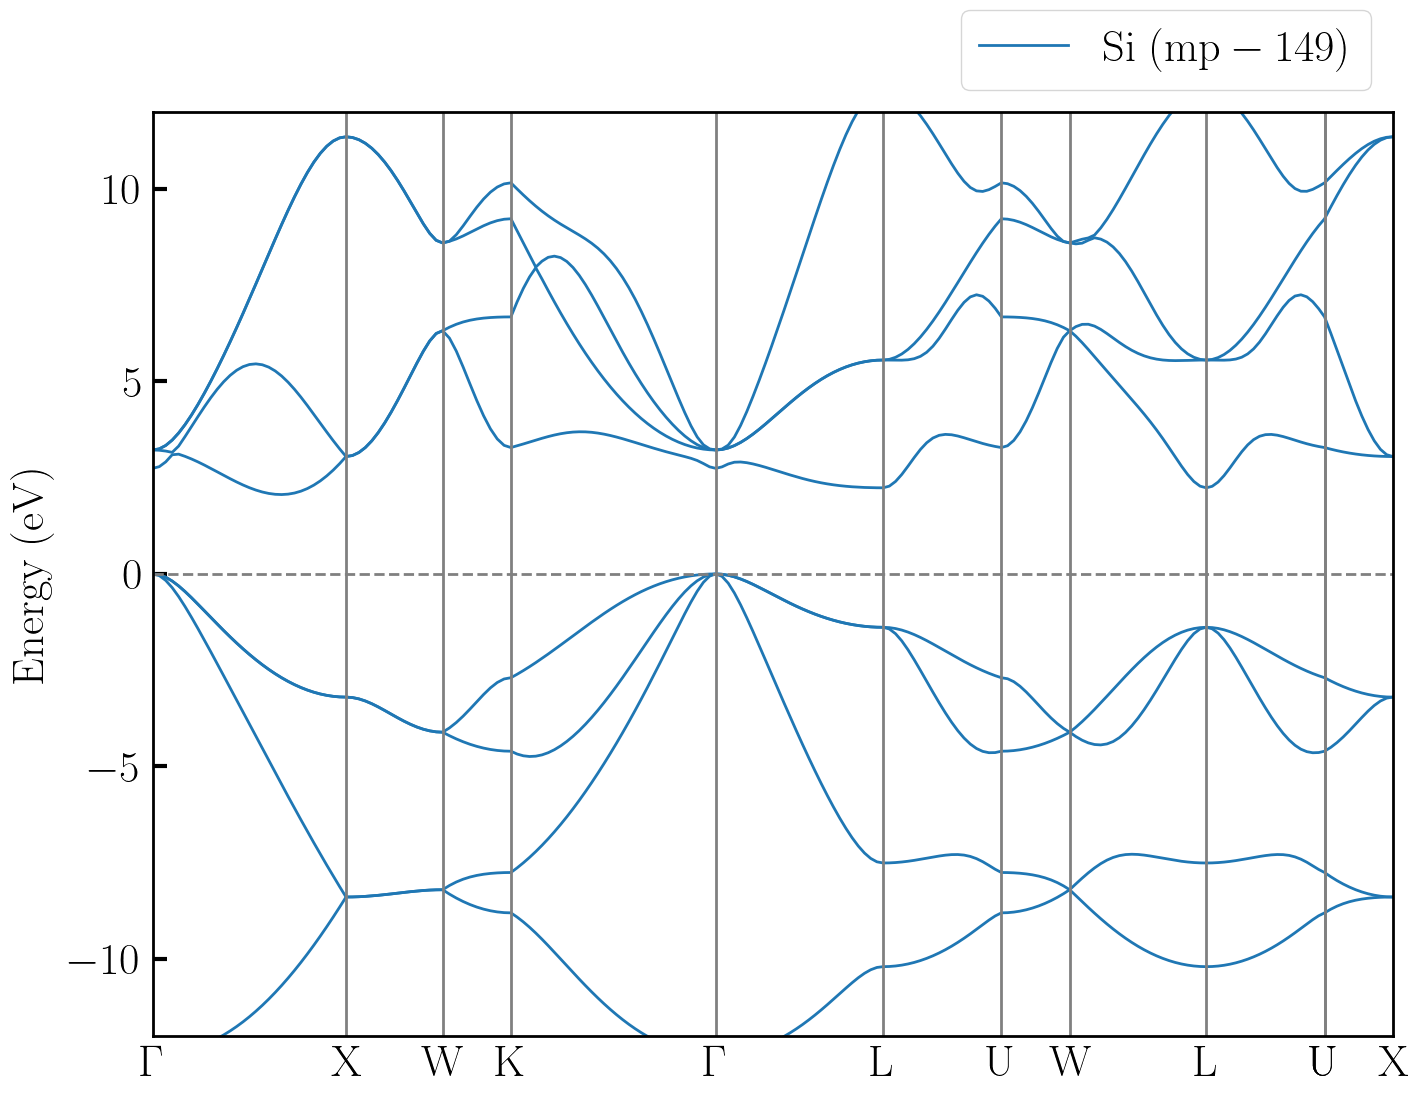

In [7]:
energy_range = (-12., 12.)

bm_McWEDA.scf(kwargs_update_scf)
bm_McWEDA.calc_band(path ="GXWKGLUWLK,UX", npoints = 200, fermi_ref = 'cbmax')

ax_band = bm_McWEDA.plot_band(energy_range = energy_range, 
                              replace_kpoint_labels = {'G':'$\Gamma$',},
                              color='C0',
                              label='$\mathrm{Si \; (mp-149)}$')
bm_McWEDA.savefig_band('bandstructure_mp-149.png')

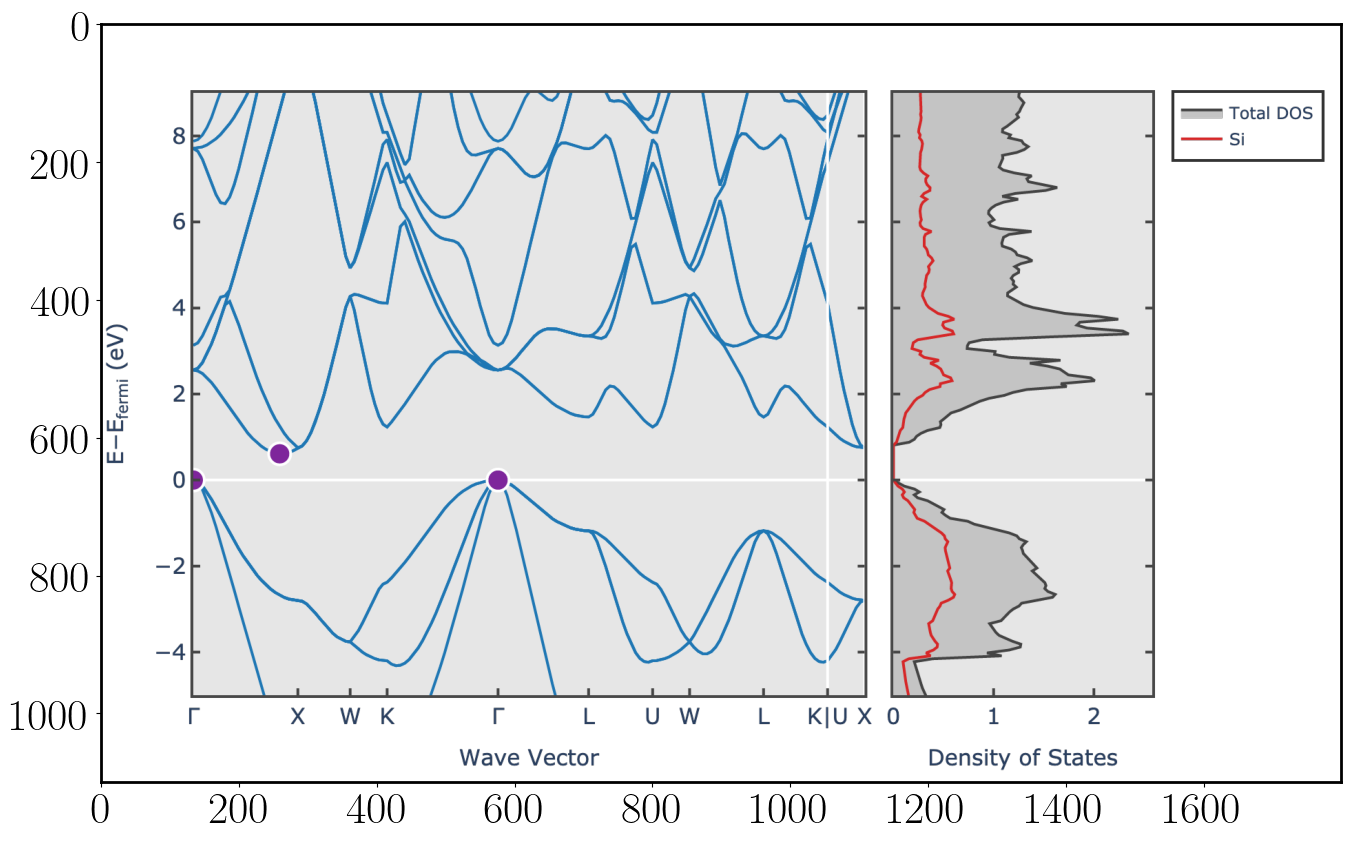

In [8]:
url="https://materialsproject-build.s3.amazonaws.com/images/electronic_structures/mp-149.png"
img = imread(url)
plt.imshow(img)

## Calculate and plot equation of state

  LIGHTNING RUNTIME :    1.33937000000000      [sec] 
The energy for cell factor 0.900 is -210.801
The energy for cell factor 0.929 is -211.879
The energy for cell factor 0.957 is -212.564
The energy for cell factor 0.986 is -213.007
The energy for cell factor 1.014 is -213.141
The energy for cell factor 1.043 is -213.174
The energy for cell factor 1.071 is -212.994
The energy for cell factor 1.100 is -212.740


Retrieving EOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

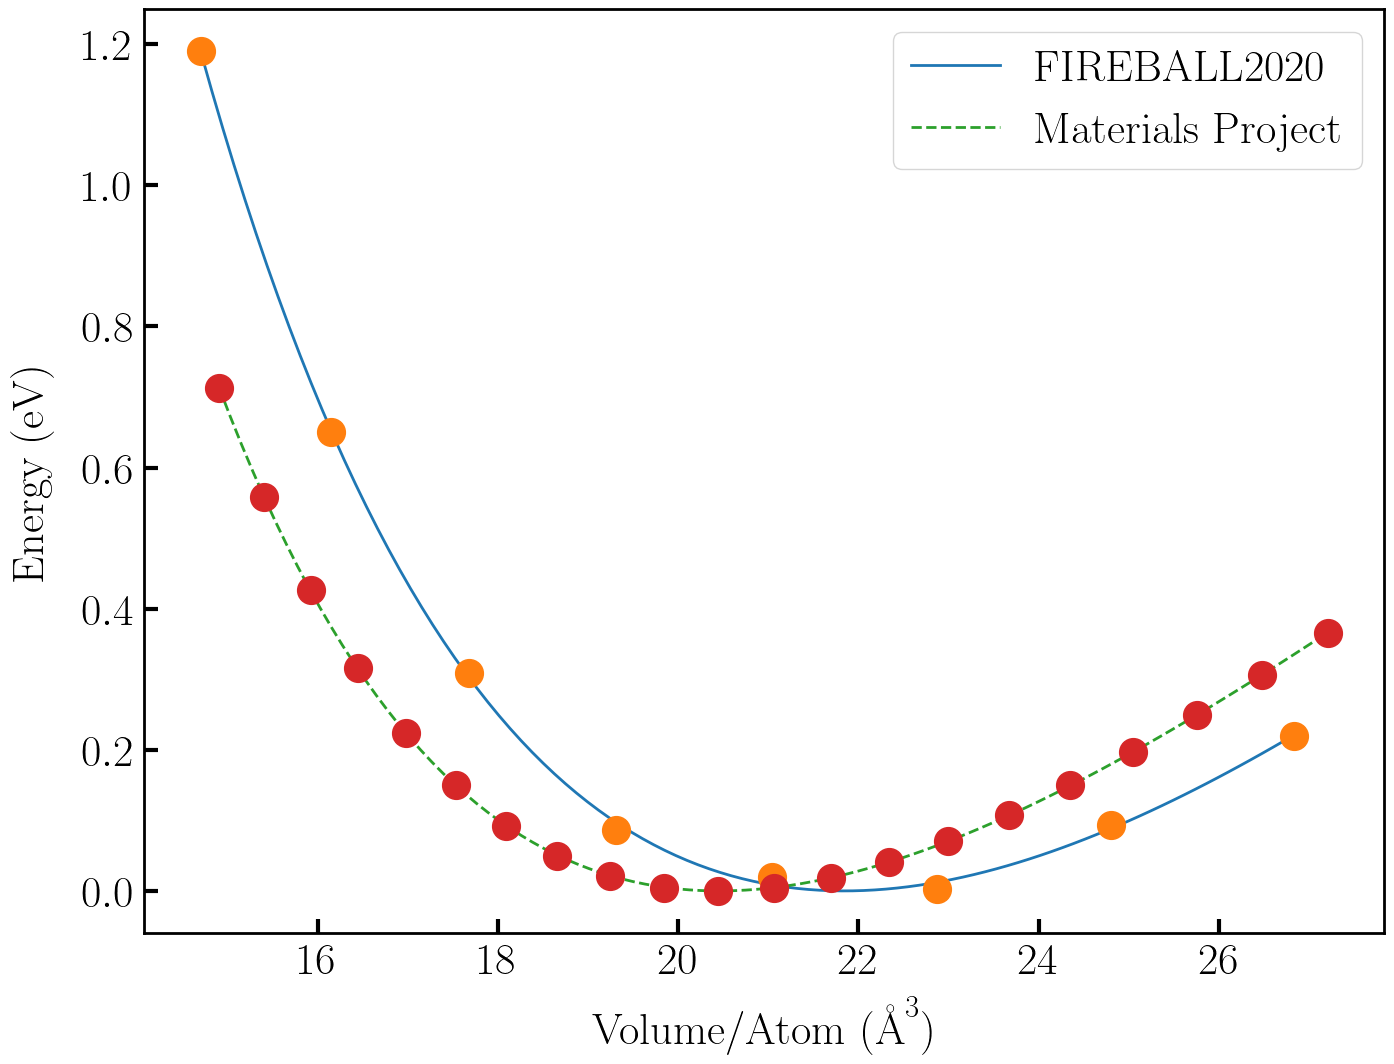

In [9]:
cell_factors = np.linspace(0.9, 1.1, 8)

# EOS from fireball
bm_McWEDA.calc_eos_data(cell_factors, kwargs_update_eos)
script_dir = os.getcwd()
npzfile = np.load( script_dir + '/bench_eos_data.npz' )
volumes, energies = npzfile['volumes'], npzfile['energies']
ax_eos = bm_McWEDA.plot_eos(volumes, energies, 
                            shiftmin = True, color='C0', mcolor='C1', ls='-',
                            label='FIREBALL2020')

# EOS from materials-project
volumes, energies = bm_McWEDA.eos_from_matproj()
ax_eos = bm_McWEDA.plot_eos(volumes, energies, ax=ax_eos, 
                            shiftmin = True, color='C2', mcolor='C3', ls='--',
                            label = 'Materials Project')
bm_McWEDA.savefig_eos('eos_mp-149.png')